In [2]:
# basic stuff 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
# from google.colab import files
import os
import sklearn
import time
import math
import itertools

# torch stuff
import torch
from torch import nn
import torch.nn.functional as F

# !pip install mat73
# import mat73

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import sys
sys.path.append('/content/drive/MyDrive/Miller_Lab/FIU/PopFRData/')
sys.path.append('/content/drive/MyDrive/Miller_Lab/FIU/xds_python/')
sys.path.append('/content/drive/MyDrive/Miller_Lab/FIU/custom_functions/')

from xds import lab_data
import joint_angles
import data_loading
import train_test
import r2_pr2
import pr2
import models
from models import TempConvNet, FCNet
import visualization

In [21]:
import importlib
import visualization

importlib.reload(visualization)

<module 'visualization' from '/content/drive/MyDrive/Miller_Lab/FIU/custom_functions/visualization.py'>

# Data

In [5]:
tcnn_dataset_dict_split = data_loading.load_datasets('/content/drive/My Drive/Miller_Lab/FIU/PopFRData/tcnn_processed_shuffled_opensim_datasets_splitneurons/instance_length_100/semirestrained/',split_neurons = True)
tcnn_loader_dict_split = data_loading.get_loaders(tcnn_dataset_dict_split, 32,split_neurons = True)

In [6]:
dataset_dict_split = data_loading.load_datasets('/content/drive/My Drive/Miller_Lab/FIU/PopFRData/processed_shuffled_opensim_datasets_splitneurons/semirestrained/',split_neurons = True)
loader_dict_split = data_loading.get_loaders(dataset_dict_split, 32,split_neurons = True)

In [11]:
dataset_dict_split.keys()

dict_keys(['20211108', '20210830', '20210921', '20211009'])

MSELoss()
Temporal CNN, full dataset
Num Conv Layers: 3, Kernel Size: 5, Total Parameters: 127279
Epoch: 000, LR: 0.001000, Train Loss: 484.484875, Test Loss: 321.774338. Train R2: -1.0605429, Test R2: -1.0771114, Train pR2: -5.6140413, Test pR2: -5.5061226
Epoch: 050, LR: 0.000800, Train Loss: 93.847604, Test Loss: 119.467033. Train R2: 0.3813018, Test R2: 0.1900212, Train pR2: 0.0951794, Test pR2: -0.0415020
Epoch: 100, LR: 0.000210, Train Loss: 82.597197, Test Loss: 124.856735. Train R2: 0.4453598, Test R2: 0.1569778, Train pR2: 0.1222292, Test pR2: -0.1114628
Time to train model: 8.296879529953003


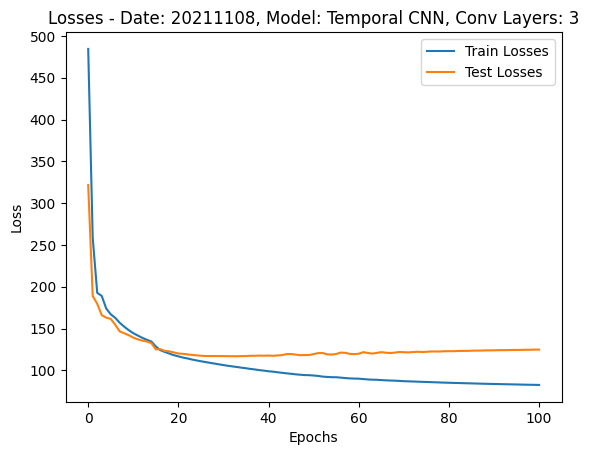

/content/drive/My Drive/Miller_Lab/FIU/Temporal_CNN/Pop_FR_OpenSIM/Standard/SplitNeurons/instance_length_100/mse_loss/semirestrained/20211108/0/TempCNN_Joint Angles_3_convlayers_reluadded
MSELoss()
Temporal CNN, full dataset
Num Conv Layers: 3, Kernel Size: 5, Total Parameters: 127279
Epoch: 000, LR: 0.001000, Train Loss: 416.049634, Test Loss: 311.347977. Train R2: -0.7355199, Test R2: -0.7116562, Train pR2: -6.7937388, Test pR2: -6.6034713
Epoch: 050, LR: 0.001000, Train Loss: 94.727164, Test Loss: 143.210754. Train R2: 0.4253560, Test R2: 0.2429206, Train pR2: -0.5104384, Test pR2: -0.6063412
Epoch: 100, LR: 0.000328, Train Loss: 79.852785, Test Loss: 142.950619. Train R2: 0.5077964, Test R2: 0.2407701, Train pR2: -0.4938081, Test pR2: -0.6848632
Time to train model: 7.971956014633179


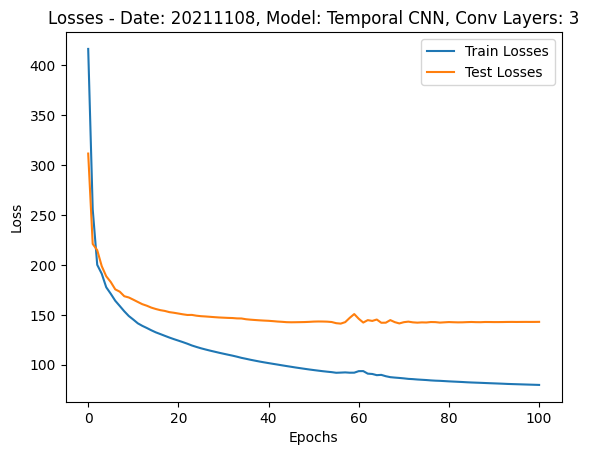

/content/drive/My Drive/Miller_Lab/FIU/Temporal_CNN/Pop_FR_OpenSIM/Standard/SplitNeurons/instance_length_100/mse_loss/semirestrained/20211108/1/TempCNN_Joint Angles_3_convlayers_reluadded
MSELoss()
Temporal CNN, full dataset
Num Conv Layers: 3, Kernel Size: 5, Total Parameters: 127279
Epoch: 000, LR: 0.001000, Train Loss: 477.623236, Test Loss: 355.765274. Train R2: -1.1165208, Test R2: -1.1831374, Train pR2: -6.8110437, Test pR2: -7.4318409
Epoch: 050, LR: 0.000800, Train Loss: 100.800267, Test Loss: 128.333340. Train R2: 0.3848571, Test R2: 0.1934286, Train pR2: -0.1834601, Test pR2: -0.3252989
Epoch: 100, LR: 0.000210, Train Loss: 87.039760, Test Loss: 135.340584. Train R2: 0.4513727, Test R2: 0.1649794, Train pR2: -0.1902115, Test pR2: -0.4314649
Time to train model: 8.341697454452515


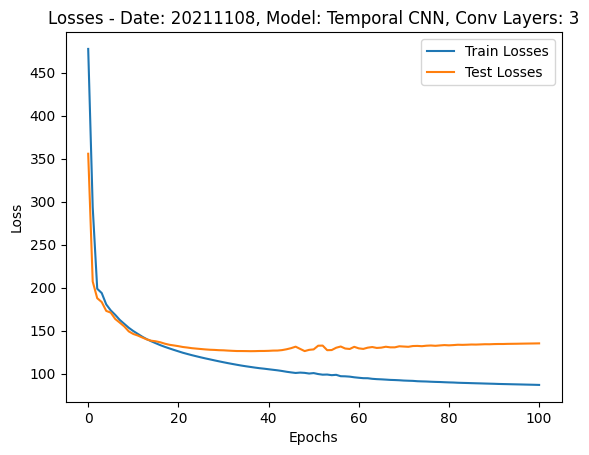

/content/drive/My Drive/Miller_Lab/FIU/Temporal_CNN/Pop_FR_OpenSIM/Standard/SplitNeurons/instance_length_100/mse_loss/semirestrained/20211108/2/TempCNN_Joint Angles_3_convlayers_reluadded
MSELoss()
Temporal CNN, full dataset
Num Conv Layers: 3, Kernel Size: 5, Total Parameters: 128630
Epoch: 000, LR: 0.001000, Train Loss: 350.810833, Test Loss: 228.931152. Train R2: -0.2419782, Test R2: -0.2452844, Train pR2: -6.3009262, Test pR2: -6.1233382
Epoch: 050, LR: 0.000512, Train Loss: 157.903208, Test Loss: 202.616709. Train R2: 0.1276310, Test R2: -0.0888596, Train pR2: -1.6909386, Test pR2: -1.7858323
Epoch: 100, LR: 0.000134, Train Loss: 143.653755, Test Loss: 209.089640. Train R2: 0.2006633, Test R2: -0.1340374, Train pR2: -1.6288513, Test pR2: -1.8028605
Time to train model: 16.181318283081055


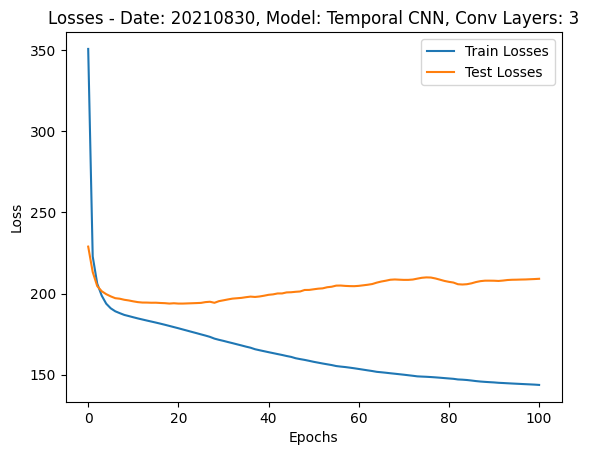

/content/drive/My Drive/Miller_Lab/FIU/Temporal_CNN/Pop_FR_OpenSIM/Standard/SplitNeurons/instance_length_100/mse_loss/semirestrained/20210830/0/TempCNN_Joint Angles_3_convlayers_reluadded
MSELoss()
Temporal CNN, full dataset
Num Conv Layers: 3, Kernel Size: 5, Total Parameters: 128630
Epoch: 000, LR: 0.001000, Train Loss: 386.405684, Test Loss: 236.816177. Train R2: -0.4733697, Test R2: -0.4613138, Train pR2: -4.0883121, Test pR2: -4.1822500
Epoch: 050, LR: 0.000512, Train Loss: 148.884767, Test Loss: 179.867971. Train R2: 0.1122500, Test R2: -0.1203054, Train pR2: -0.7745013, Test pR2: -0.9484280
Epoch: 100, LR: 0.000134, Train Loss: 136.237082, Test Loss: 185.638535. Train R2: 0.1836040, Test R2: -0.1609810, Train pR2: -0.5166560, Test pR2: -0.7710878
Time to train model: 16.240155458450317


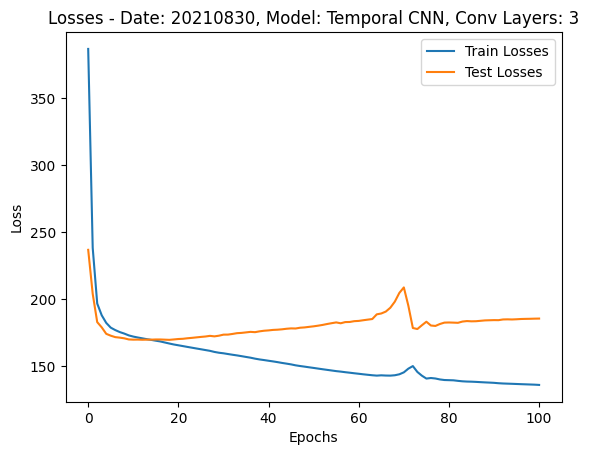

/content/drive/My Drive/Miller_Lab/FIU/Temporal_CNN/Pop_FR_OpenSIM/Standard/SplitNeurons/instance_length_100/mse_loss/semirestrained/20210830/1/TempCNN_Joint Angles_3_convlayers_reluadded
MSELoss()
Temporal CNN, full dataset
Num Conv Layers: 3, Kernel Size: 5, Total Parameters: 128630
Epoch: 000, LR: 0.001000, Train Loss: 596.492666, Test Loss: 379.743520. Train R2: -0.3586864, Test R2: -0.3796054, Train pR2: -7.2324057, Test pR2: -7.5064135
Epoch: 050, LR: 0.000640, Train Loss: 247.940319, Test Loss: 293.812174. Train R2: 0.0714268, Test R2: -0.0702904, Train pR2: -1.6402555, Test pR2: -1.7908982
Epoch: 100, LR: 0.000168, Train Loss: 218.801324, Test Loss: 309.755717. Train R2: 0.1701686, Test R2: -0.1351919, Train pR2: -0.6092786, Test pR2: -0.8967100
Time to train model: 15.986794471740723


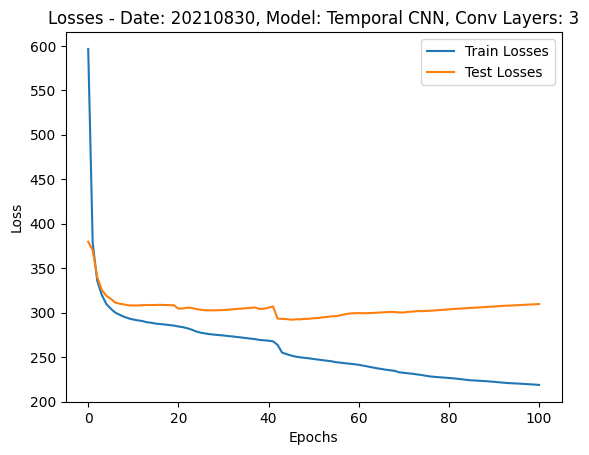

/content/drive/My Drive/Miller_Lab/FIU/Temporal_CNN/Pop_FR_OpenSIM/Standard/SplitNeurons/instance_length_100/mse_loss/semirestrained/20210830/2/TempCNN_Joint Angles_3_convlayers_reluadded
MSELoss()
Temporal CNN, full dataset
Num Conv Layers: 3, Kernel Size: 5, Total Parameters: 129209
Epoch: 000, LR: 0.001000, Train Loss: 257.688266, Test Loss: 167.934347. Train R2: -0.1967683, Test R2: -0.2753997, Train pR2: -3.7492669, Test pR2: -4.0990152
Epoch: 050, LR: 0.000800, Train Loss: 87.120986, Test Loss: 109.949130. Train R2: 0.3355417, Test R2: 0.1590081, Train pR2: -1.8023061, Test pR2: -2.0666831
Epoch: 100, LR: 0.000328, Train Loss: 75.929379, Test Loss: 110.069959. Train R2: 0.4228497, Test R2: 0.1620884, Train pR2: -1.4913688, Test pR2: -1.7970859
Time to train model: 17.583365440368652


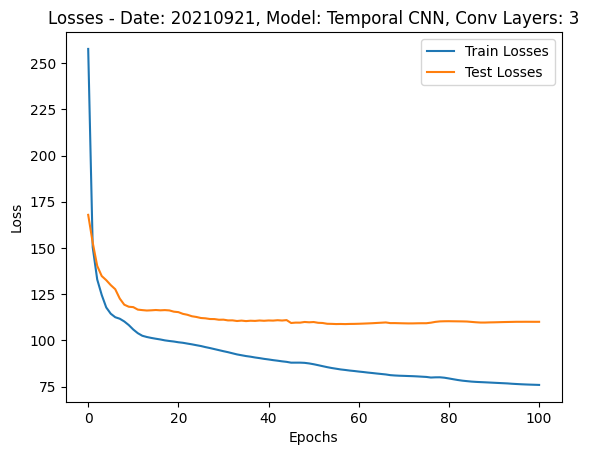

/content/drive/My Drive/Miller_Lab/FIU/Temporal_CNN/Pop_FR_OpenSIM/Standard/SplitNeurons/instance_length_100/mse_loss/semirestrained/20210921/0/TempCNN_Joint Angles_3_convlayers_reluadded
MSELoss()
Temporal CNN, full dataset
Num Conv Layers: 3, Kernel Size: 5, Total Parameters: 129209
Epoch: 000, LR: 0.001000, Train Loss: 288.062836, Test Loss: 197.149424. Train R2: -0.1301550, Test R2: -0.1297107, Train pR2: -2.5338449, Test pR2: -2.5063317
Epoch: 050, LR: 0.000800, Train Loss: 99.328323, Test Loss: 135.776802. Train R2: 0.3862917, Test R2: 0.2256497, Train pR2: -1.2249578, Test pR2: -1.3838975
Epoch: 100, LR: 0.000262, Train Loss: 87.272789, Test Loss: 139.823156. Train R2: 0.4407000, Test R2: 0.1995836, Train pR2: -0.5235646, Test pR2: -0.7606991
Time to train model: 17.377507209777832


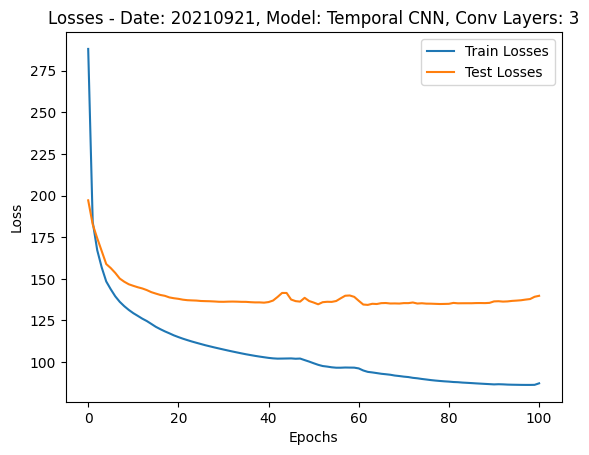

/content/drive/My Drive/Miller_Lab/FIU/Temporal_CNN/Pop_FR_OpenSIM/Standard/SplitNeurons/instance_length_100/mse_loss/semirestrained/20210921/1/TempCNN_Joint Angles_3_convlayers_reluadded
MSELoss()
Temporal CNN, full dataset
Num Conv Layers: 3, Kernel Size: 5, Total Parameters: 129209
Epoch: 000, LR: 0.001000, Train Loss: 323.410467, Test Loss: 186.911880. Train R2: -0.1172517, Test R2: -0.1248666, Train pR2: -2.7372282, Test pR2: -2.7203884
Epoch: 050, LR: 0.001000, Train Loss: 96.971611, Test Loss: 124.965151. Train R2: 0.4320230, Test R2: 0.2416292, Train pR2: -1.2302371, Test pR2: -1.3978012
Epoch: 100, LR: 0.000262, Train Loss: 83.640137, Test Loss: 127.102567. Train R2: 0.5060142, Test R2: 0.2296563, Train pR2: -1.1835552, Test pR2: -1.5081110
Time to train model: 17.19151782989502


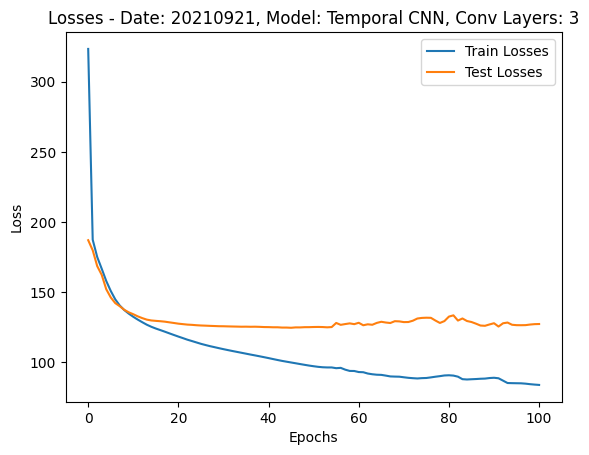

/content/drive/My Drive/Miller_Lab/FIU/Temporal_CNN/Pop_FR_OpenSIM/Standard/SplitNeurons/instance_length_100/mse_loss/semirestrained/20210921/2/TempCNN_Joint Angles_3_convlayers_reluadded
MSELoss()
Temporal CNN, full dataset
Num Conv Layers: 3, Kernel Size: 5, Total Parameters: 128823
Epoch: 000, LR: 0.001000, Train Loss: 487.429013, Test Loss: 282.994110. Train R2: -0.6184062, Test R2: -0.5866067, Train pR2: -4.6861176, Test pR2: -4.4949193
Epoch: 050, LR: 0.001000, Train Loss: 119.958926, Test Loss: 137.576693. Train R2: 0.3197244, Test R2: 0.2100025, Train pR2: -1.3614680, Test pR2: -1.4192334
Epoch: 100, LR: 0.000410, Train Loss: 105.754523, Test Loss: 139.704351. Train R2: 0.3961418, Test R2: 0.1937143, Train pR2: -0.9926843, Test pR2: -1.1140307
Time to train model: 17.11669111251831


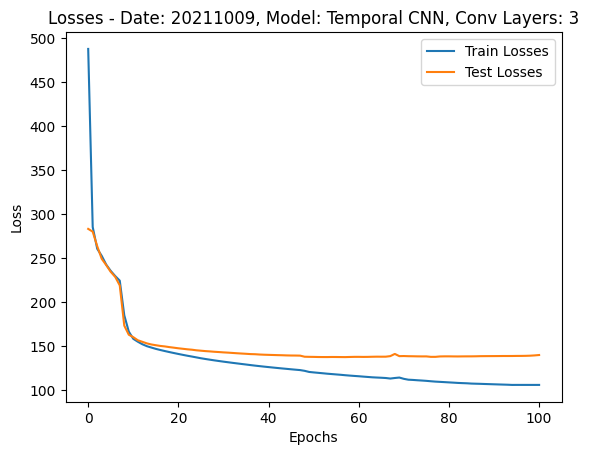

/content/drive/My Drive/Miller_Lab/FIU/Temporal_CNN/Pop_FR_OpenSIM/Standard/SplitNeurons/instance_length_100/mse_loss/semirestrained/20211009/0/TempCNN_Joint Angles_3_convlayers_reluadded
MSELoss()
Temporal CNN, full dataset
Num Conv Layers: 3, Kernel Size: 5, Total Parameters: 128823
Epoch: 000, LR: 0.001000, Train Loss: 238.565857, Test Loss: 137.105108. Train R2: -0.2439065, Test R2: -0.2561053, Train pR2: -3.5948033, Test pR2: -3.7338850
Epoch: 050, LR: 0.001000, Train Loss: 76.034796, Test Loss: 91.939168. Train R2: 0.3195640, Test R2: 0.1814367, Train pR2: -1.0184429, Test pR2: -1.2006265
Epoch: 100, LR: 0.000328, Train Loss: 66.943676, Test Loss: 96.707507. Train R2: 0.3817550, Test R2: 0.1362980, Train pR2: -0.9875360, Test pR2: -1.2851173
Time to train model: 17.107321977615356


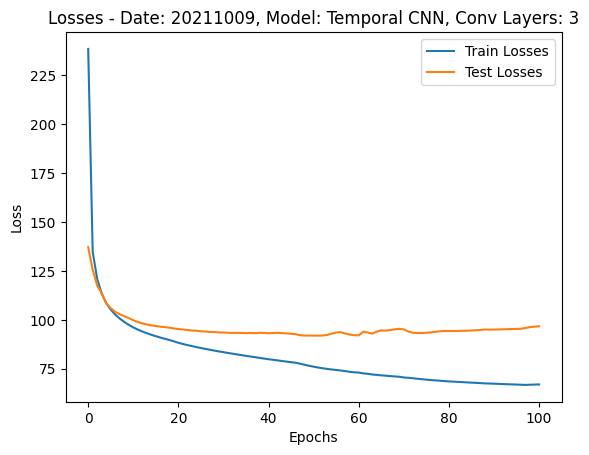

/content/drive/My Drive/Miller_Lab/FIU/Temporal_CNN/Pop_FR_OpenSIM/Standard/SplitNeurons/instance_length_100/mse_loss/semirestrained/20211009/1/TempCNN_Joint Angles_3_convlayers_reluadded
MSELoss()
Temporal CNN, full dataset
Num Conv Layers: 3, Kernel Size: 5, Total Parameters: 129209
Epoch: 000, LR: 0.001000, Train Loss: 219.535943, Test Loss: 137.229935. Train R2: -0.3116824, Test R2: -0.3170945, Train pR2: -5.6814890, Test pR2: -5.7648730
Epoch: 050, LR: 0.000800, Train Loss: 68.373961, Test Loss: 79.377947. Train R2: 0.3268260, Test R2: 0.2217242, Train pR2: -1.4149622, Test pR2: -1.4948560
Epoch: 100, LR: 0.000328, Train Loss: 61.252697, Test Loss: 78.784523. Train R2: 0.4002746, Test R2: 0.2294156, Train pR2: -1.1073039, Test pR2: -1.2817457
Time to train model: 17.245134592056274


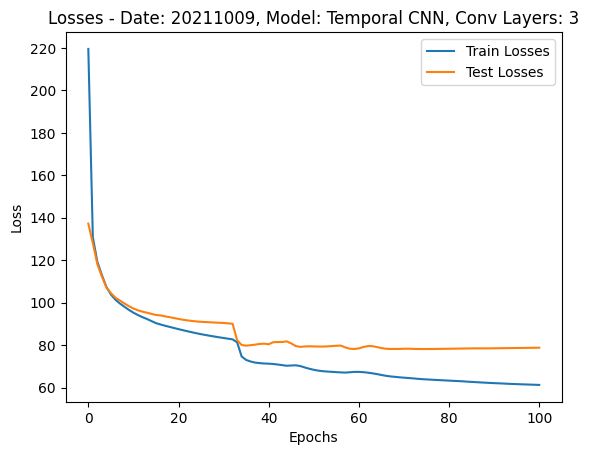

/content/drive/My Drive/Miller_Lab/FIU/Temporal_CNN/Pop_FR_OpenSIM/Standard/SplitNeurons/instance_length_100/mse_loss/semirestrained/20211009/2/TempCNN_Joint Angles_3_convlayers_reluadded


In [14]:
tcn_models_dict = {}
for date in tcnn_dataset_dict_split.keys():
    tcn_models_dict[date] = {}
    for split_num in ['0','1','2']:
        model = visualization.plot_losses_TempCNN(tcnn_dataset_dict_split[date]['Joint Angles'][split_num]['Full'],
                                                  tcnn_loader_dict_split[date]['Joint Angles'][split_num]['Train'],
                                                  tcnn_loader_dict_split[date]['Joint Angles'][split_num]['Test'],
                                                  0.001, 3, add_relu = True, causal = True, adapt_lr = True, save = True,
                                                  numepochs = 101, split = 'SplitNeurons',loss_type = 'mse_loss',
                                                  restraint_type='semirestrained')
        tcn_models_dict[date][split_num] = model

Multi-Layer Perceptron, full dataset
Num Layers: 3, Hidden Layer Dimensionality: 112, Total Parameters: 18959
Epoch: 000, LR: 0.001000, Train Loss: 156.390338, Test Loss: 135.912710. Train R2: 0.1267973, Test R2: 0.1195654, Train pR2: -0.0181364, Test pR2: -0.0323189
Epoch: 050, LR: 0.000800, Train Loss: 87.911722, Test Loss: 113.745461. Train R2: 0.4321716, Test R2: 0.2628145, Train pR2: -0.0451526, Test pR2: -0.2224129
Epoch: 100, LR: 0.000262, Train Loss: 79.588596, Test Loss: 113.273623. Train R2: 0.4874089, Test R2: 0.2661272, Train pR2: -0.0403084, Test pR2: -0.2970409
Time to train model: 145.93118906021118


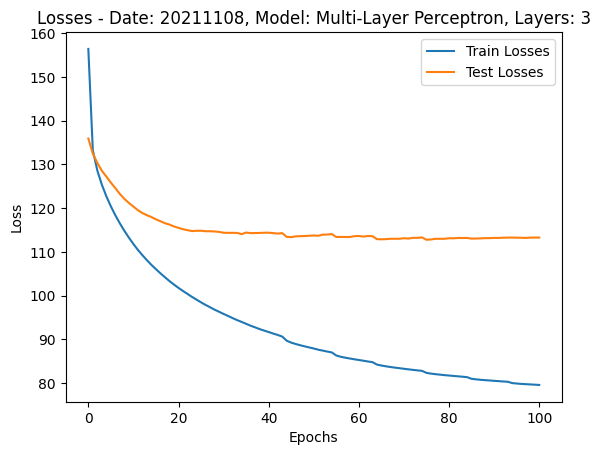

Multi-Layer Perceptron, full dataset
Num Layers: 3, Hidden Layer Dimensionality: 112, Total Parameters: 18959
Epoch: 000, LR: 0.001000, Train Loss: 171.875867, Test Loss: 148.672686. Train R2: 0.1192620, Test R2: 0.1240689, Train pR2: -1.2931519, Test pR2: -1.2717265
Epoch: 050, LR: 0.000800, Train Loss: 95.609152, Test Loss: 122.419073. Train R2: 0.4370372, Test R2: 0.2789116, Train pR2: -0.6137035, Test pR2: -0.7858092
Epoch: 100, LR: 0.000262, Train Loss: 86.282604, Test Loss: 122.154726. Train R2: 0.4952982, Test R2: 0.2802579, Train pR2: -0.6286732, Test pR2: -0.9187792
Time to train model: 148.6617076396942


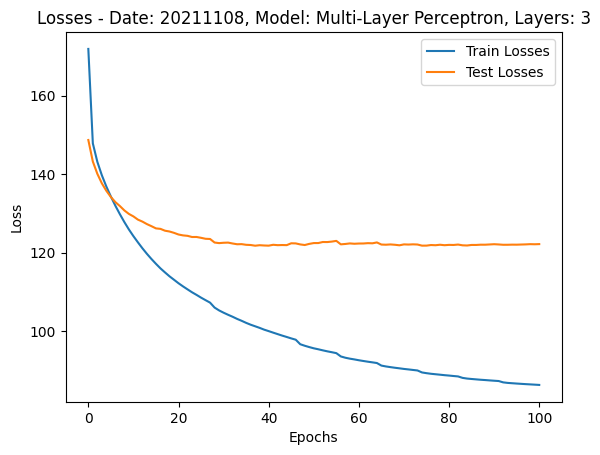

Multi-Layer Perceptron, full dataset
Num Layers: 3, Hidden Layer Dimensionality: 112, Total Parameters: 18959
Epoch: 000, LR: 0.001000, Train Loss: 167.316495, Test Loss: 155.293431. Train R2: 0.1258000, Test R2: 0.1088260, Train pR2: -0.0646918, Test pR2: -0.0849553
Epoch: 050, LR: 0.001000, Train Loss: 96.099849, Test Loss: 124.270042. Train R2: 0.4143035, Test R2: 0.2863656, Train pR2: -0.1180891, Test pR2: -0.3010486
Epoch: 100, LR: 0.000410, Train Loss: 86.809906, Test Loss: 123.146685. Train R2: 0.4676284, Test R2: 0.2929586, Train pR2: -0.1016322, Test pR2: -0.3579805
Time to train model: 146.22564053535461


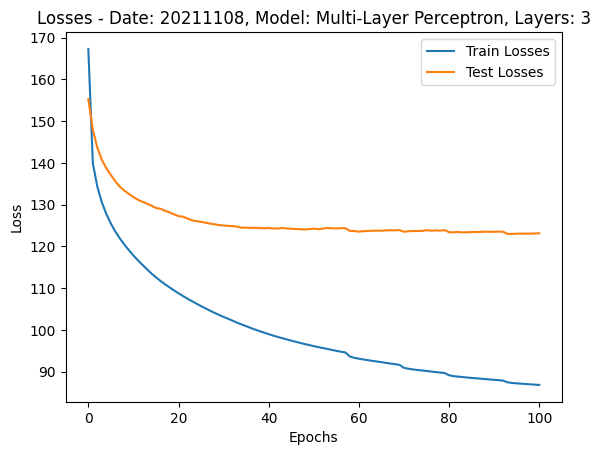

Multi-Layer Perceptron, full dataset
Num Layers: 3, Hidden Layer Dimensionality: 112, Total Parameters: 19750
Epoch: 000, LR: 0.001000, Train Loss: 197.783708, Test Loss: 189.858140. Train R2: -0.0249606, Test R2: -0.0295968, Train pR2: -1.4412577, Test pR2: -1.4554728
Epoch: 050, LR: 0.000410, Train Loss: 149.722432, Test Loss: 180.943149. Train R2: 0.1842303, Test R2: 0.0188906, Train pR2: -1.1588780, Test pR2: -1.3074460
Epoch: 100, LR: 0.000134, Train Loss: 143.876961, Test Loss: 182.140482. Train R2: 0.2197401, Test R2: 0.0123892, Train pR2: -1.1484543, Test pR2: -1.3390656
Time to train model: 289.8717474937439


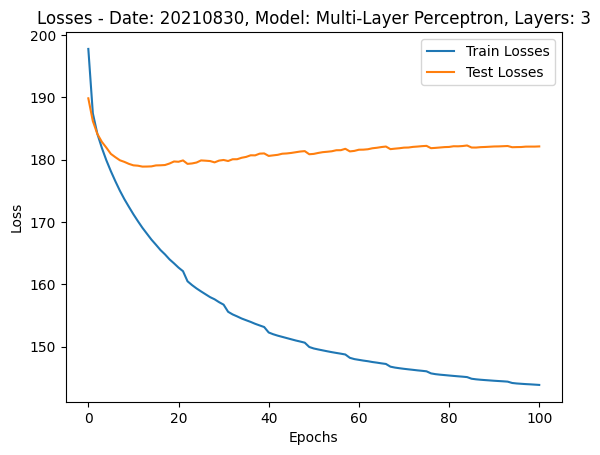

Multi-Layer Perceptron, full dataset
Num Layers: 3, Hidden Layer Dimensionality: 112, Total Parameters: 19750
Epoch: 000, LR: 0.001000, Train Loss: 185.362440, Test Loss: 178.113156. Train R2: -0.0371376, Test R2: -0.0489909, Train pR2: -2.0984867, Test pR2: -2.1292970
Epoch: 050, LR: 0.000512, Train Loss: 140.430613, Test Loss: 170.335758. Train R2: 0.1694482, Test R2: -0.0033301, Train pR2: -1.3604251, Test pR2: -1.5608888
Epoch: 100, LR: 0.000134, Train Loss: 133.756923, Test Loss: 170.830530. Train R2: 0.2107653, Test R2: -0.0063233, Train pR2: -0.8619501, Test pR2: -1.1387297
Time to train model: 287.4422378540039


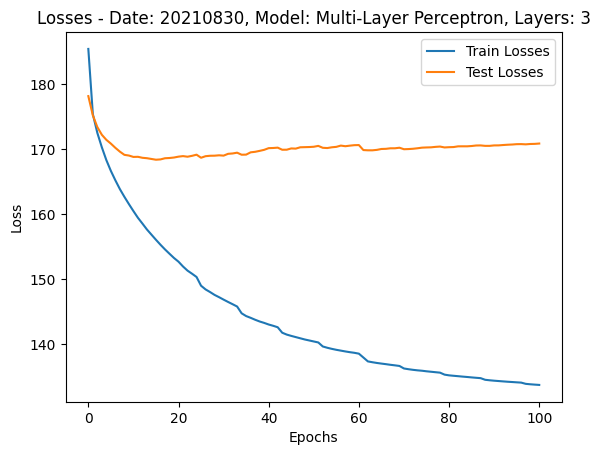

Multi-Layer Perceptron, full dataset
Num Layers: 3, Hidden Layer Dimensionality: 112, Total Parameters: 19750
Epoch: 000, LR: 0.001000, Train Loss: 319.395516, Test Loss: 304.187300. Train R2: -0.1263914, Test R2: -0.1341182, Train pR2: -6.0300670, Test pR2: -6.0284386
Epoch: 050, LR: 0.000512, Train Loss: 213.726224, Test Loss: 262.883948. Train R2: 0.2017827, Test R2: 0.0196638, Train pR2: -0.9472730, Test pR2: -1.1648345
Epoch: 100, LR: 0.000168, Train Loss: 202.385935, Test Loss: 265.713199. Train R2: 0.2453113, Test R2: 0.0090124, Train pR2: -0.9269339, Test pR2: -1.2358093
Time to train model: 287.8269941806793


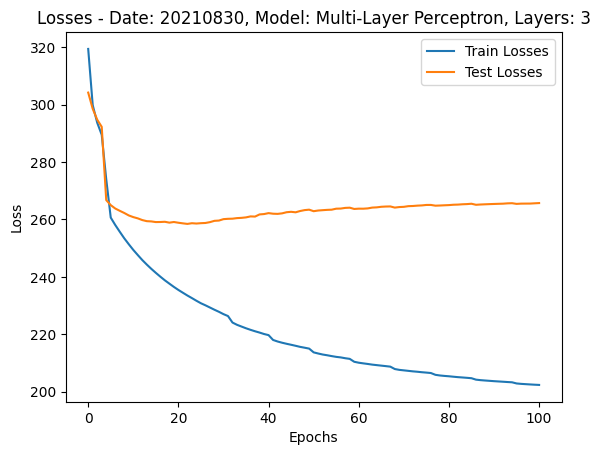

Multi-Layer Perceptron, full dataset
Num Layers: 3, Hidden Layer Dimensionality: 112, Total Parameters: 20089
Epoch: 000, LR: 0.001000, Train Loss: 134.055910, Test Loss: 123.767860. Train R2: 0.0510099, Test R2: 0.0526171, Train pR2: -4.0313096, Test pR2: -4.0281873
Epoch: 050, LR: 0.001000, Train Loss: 78.414278, Test Loss: 89.207355. Train R2: 0.4013340, Test R2: 0.3171481, Train pR2: -1.0659206, Test pR2: -1.1286401
Epoch: 100, LR: 0.000410, Train Loss: 73.335133, Test Loss: 88.235223. Train R2: 0.4380053, Test R2: 0.3245777, Train pR2: -1.0450779, Test pR2: -1.1378744
Time to train model: 305.7050702571869


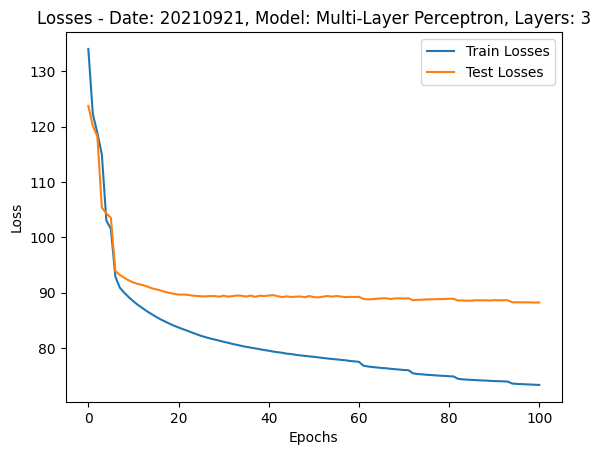

Multi-Layer Perceptron, full dataset
Num Layers: 3, Hidden Layer Dimensionality: 112, Total Parameters: 20089
Epoch: 000, LR: 0.001000, Train Loss: 146.878574, Test Loss: 133.524187. Train R2: 0.1772770, Test R2: 0.1718052, Train pR2: -0.5970143, Test pR2: -0.5965772
Epoch: 050, LR: 0.000800, Train Loss: 98.123885, Test Loss: 113.960924. Train R2: 0.3935813, Test R2: 0.2931163, Train pR2: -0.6435342, Test pR2: -0.7247763
Epoch: 100, LR: 0.000262, Train Loss: 91.948583, Test Loss: 112.778204. Train R2: 0.4316965, Test R2: 0.3004552, Train pR2: -0.6224849, Test pR2: -0.7298661
Time to train model: 305.6308720111847


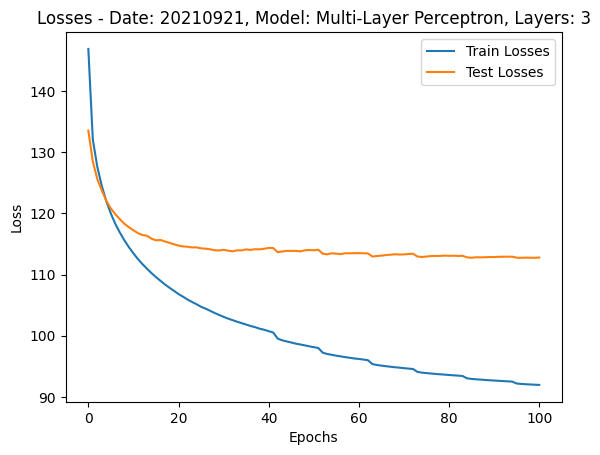

Multi-Layer Perceptron, full dataset
Num Layers: 3, Hidden Layer Dimensionality: 112, Total Parameters: 20089
Epoch: 000, LR: 0.001000, Train Loss: 163.822910, Test Loss: 155.572364. Train R2: 0.0863051, Test R2: 0.0684169, Train pR2: -2.9290009, Test pR2: -2.9491613
Epoch: 050, LR: 0.000800, Train Loss: 95.885422, Test Loss: 111.984755. Train R2: 0.4284940, Test R2: 0.3294133, Train pR2: -1.2165968, Test pR2: -1.3033022
Epoch: 100, LR: 0.000328, Train Loss: 89.191413, Test Loss: 110.445591. Train R2: 0.4682805, Test R2: 0.3386474, Train pR2: -1.1618996, Test pR2: -1.2743943
Time to train model: 305.2959494590759


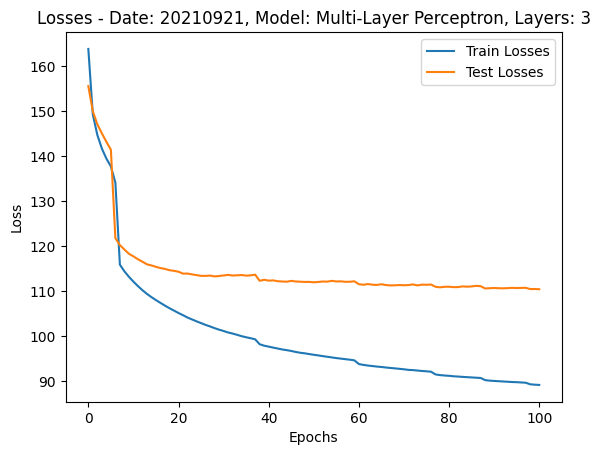

Multi-Layer Perceptron, full dataset
Num Layers: 3, Hidden Layer Dimensionality: 112, Total Parameters: 19863
Epoch: 000, LR: 0.001000, Train Loss: 171.575147, Test Loss: 150.448103. Train R2: 0.1420565, Test R2: 0.1385766, Train pR2: -2.8983083, Test pR2: -2.9157901
Epoch: 050, LR: 0.001000, Train Loss: 111.221601, Test Loss: 123.347645. Train R2: 0.3723986, Test R2: 0.2937706, Train pR2: -1.2408998, Test pR2: -1.3207989
Epoch: 100, LR: 0.000410, Train Loss: 103.800860, Test Loss: 121.714562. Train R2: 0.4133837, Test R2: 0.3031195, Train pR2: -0.9522848, Test pR2: -1.0505303
Time to train model: 305.2069127559662


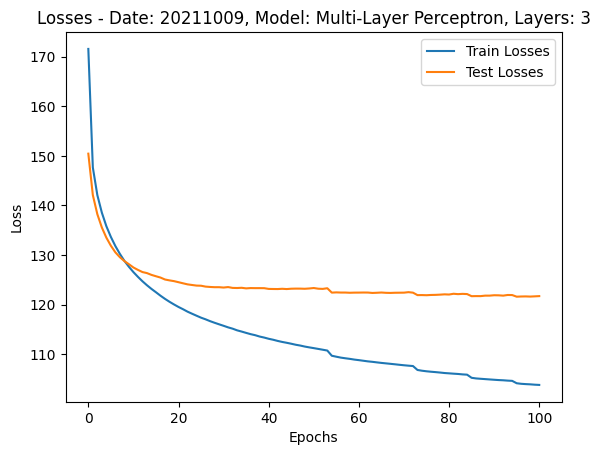

Multi-Layer Perceptron, full dataset
Num Layers: 3, Hidden Layer Dimensionality: 112, Total Parameters: 19863
Epoch: 000, LR: 0.001000, Train Loss: 102.184284, Test Loss: 93.417504. Train R2: 0.1630000, Test R2: 0.1528710, Train pR2: -1.5669286, Test pR2: -1.5822550
Epoch: 050, LR: 0.001000, Train Loss: 68.325571, Test Loss: 77.273389. Train R2: 0.3785813, Test R2: 0.2992455, Train pR2: -0.7866168, Test pR2: -0.8487929
Epoch: 100, LR: 0.000410, Train Loss: 63.919734, Test Loss: 76.664099. Train R2: 0.4147936, Test R2: 0.3047748, Train pR2: -0.7551029, Test pR2: -0.8468564
Time to train model: 304.3304057121277


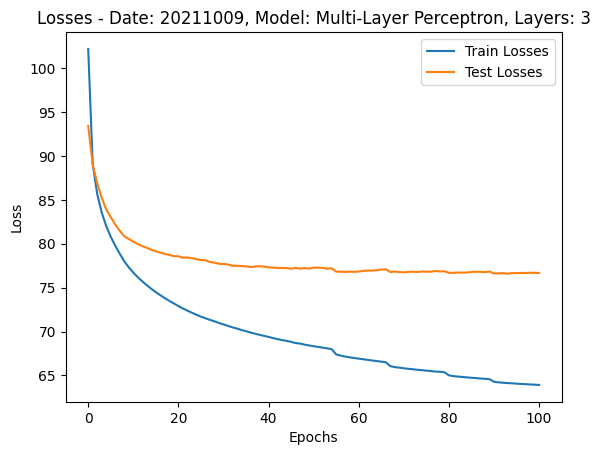

Multi-Layer Perceptron, full dataset
Num Layers: 3, Hidden Layer Dimensionality: 112, Total Parameters: 20089
Epoch: 000, LR: 0.001000, Train Loss: 112.275435, Test Loss: 104.719261. Train R2: -0.0168546, Test R2: -0.0198883, Train pR2: -3.8503451, Test pR2: -3.9041409
Epoch: 050, LR: 0.001000, Train Loss: 62.690354, Test Loss: 71.020563. Train R2: 0.3847811, Test R2: 0.3083109, Train pR2: -0.4998846, Test pR2: -0.5859560
Epoch: 100, LR: 0.000512, Train Loss: 59.065174, Test Loss: 70.090802. Train R2: 0.4198342, Test R2: 0.3173730, Train pR2: -0.4802596, Test pR2: -0.5939195
Time to train model: 308.9720757007599


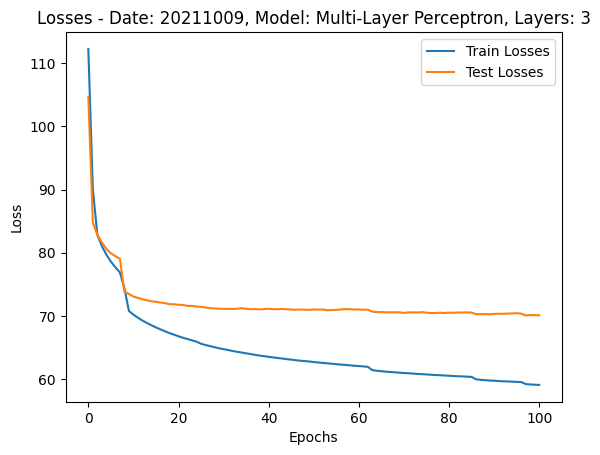

In [15]:
mlp_models_dict = {}
for date in tcnn_dataset_dict_split.keys():
    mlp_models_dict[date] = {}
    for split_num in ['0','1','2']:
        model = visualization.plot_losses_MLP(dataset_dict_split[date]['Joint Angles'][split_num]['Full'],
                                              loader_dict_split[date]['Joint Angles'][split_num]['Train'],
                                              loader_dict_split[date]['Joint Angles'][split_num]['Test'],
                                              0.001, 3, add_relu = True, adapt_lr = True, save = True,
                                              numepochs = 101, split = 'SplitNeurons',loss_type = 'mse_loss',
                                              restraint_type='semirestrained')
        mlp_models_dict[date][split_num] = model

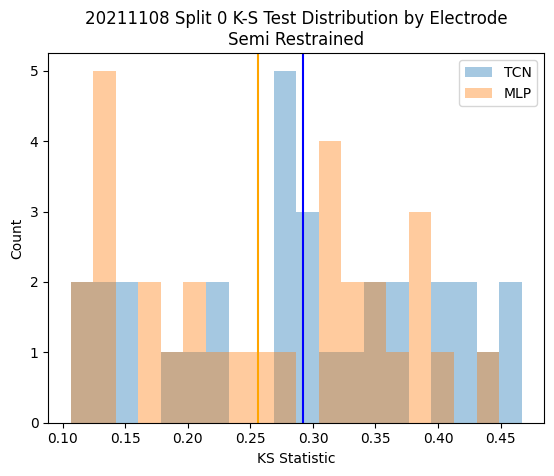

Mean KS TCN: 0.29214746543778797, Mean KS MLP: 0.255724552899883


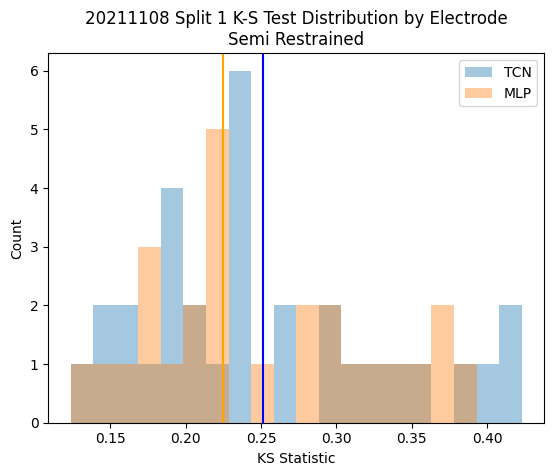

Mean KS TCN: 0.251594470046083, Mean KS MLP: 0.2246643267034375


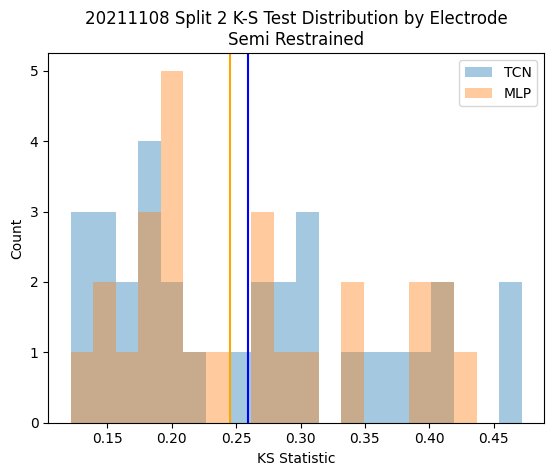

Mean KS TCN: 0.2592718894009216, Mean KS MLP: 0.2453432874626256


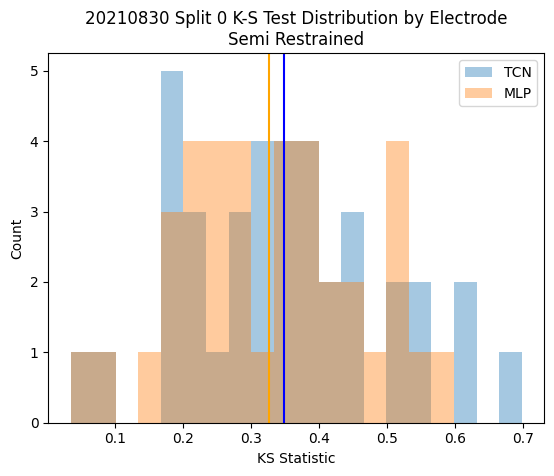

Mean KS TCN: 0.3489827179890024, Mean KS MLP: 0.3266821473119376


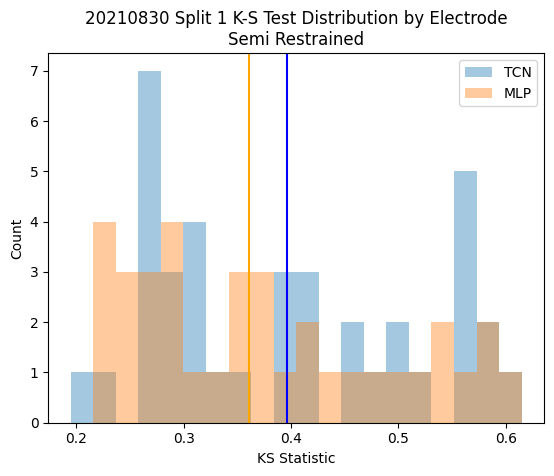

Mean KS TCN: 0.3961115475255303, Mean KS MLP: 0.36100367926822574


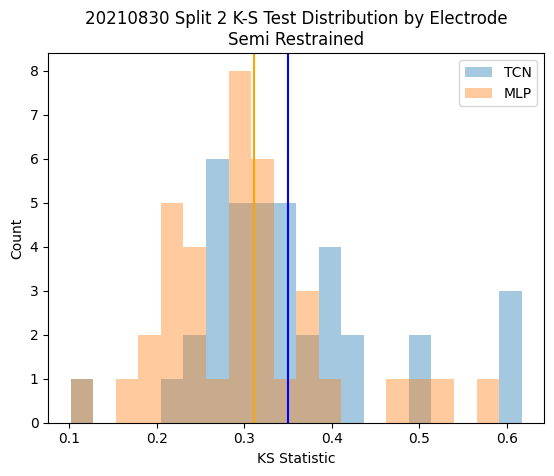

Mean KS TCN: 0.3494736842105264, Mean KS MLP: 0.3110354512006652


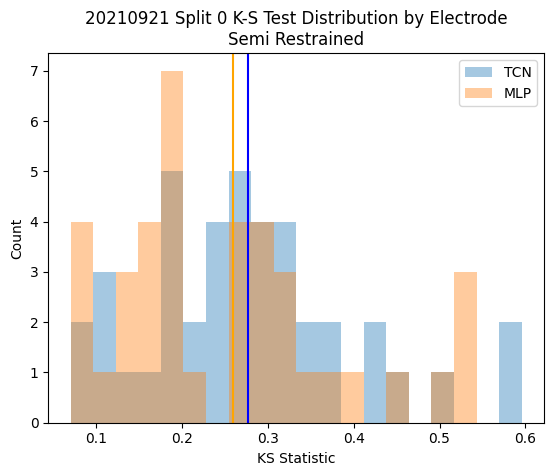

Mean KS TCN: 0.27696667811748543, Mean KS MLP: 0.2601706523501789


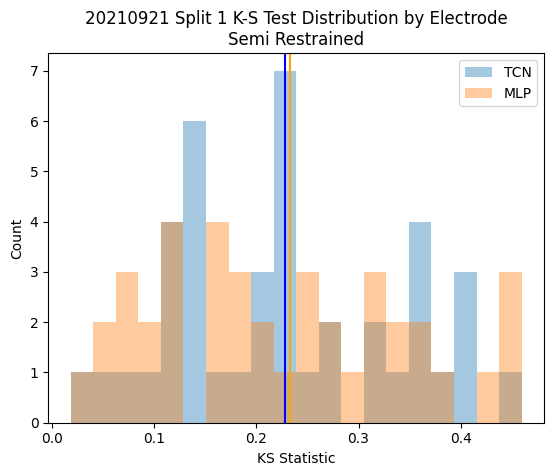

Mean KS TCN: 0.22825489522500858, Mean KS MLP: 0.23257507012755796


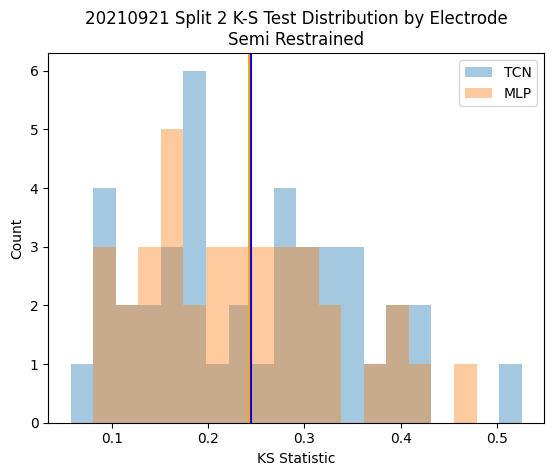

Mean KS TCN: 0.24489866025420814, Mean KS MLP: 0.24279143908994613


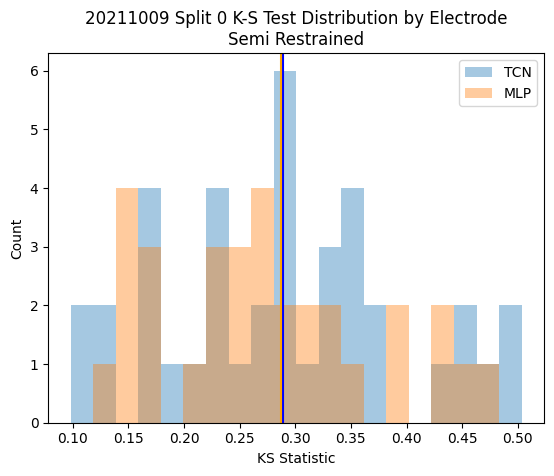

Mean KS TCN: 0.2885951607078367, Mean KS MLP: 0.2874268655850209


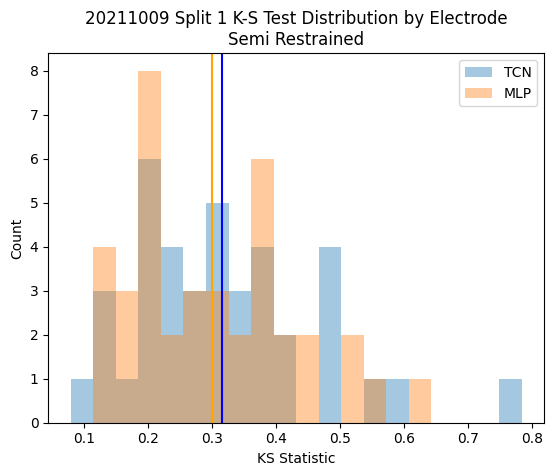

Mean KS TCN: 0.3158252076561936, Mean KS MLP: 0.2998248038564916


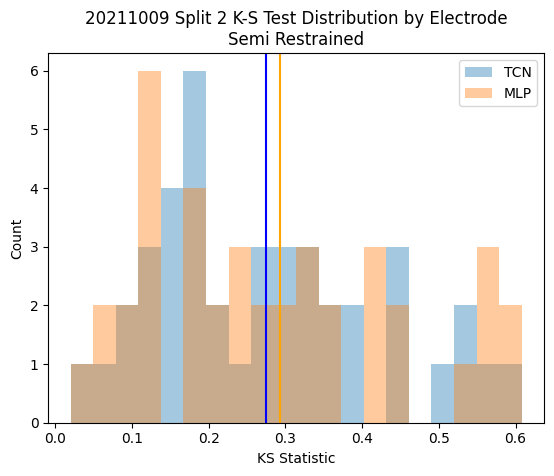

Mean KS TCN: 0.2745173479903813, Mean KS MLP: 0.2932867311414662


In [19]:
for date in tcn_models_dict.keys():
    for split_num in tcn_models_dict[date].keys():
        model_1_name = 'TCN'
        model1 = tcn_models_dict[date][split_num]
        dataset1 = tcnn_dataset_dict_split[date]['Joint Angles'][split_num]['Full']
        test_loader1 = tcnn_loader_dict_split[date]['Joint Angles'][split_num]['Test']
        conv1 = True
        model_2_name = 'MLP'
        model2 = mlp_models_dict[date][split_num]
        dataset2 = dataset_dict_split[date]['Joint Angles'][split_num]['Full']
        test_loader2 = loader_dict_split[date]['Joint Angles'][split_num]['Test']
        conv2 = False
        mean_model_1, mean_model_2 = visualization.plot_and_compare_ks(model_1_name, model1, dataset1, test_loader1, conv1, model_2_name, model2, dataset2, test_loader2, conv2, 'Semi Restrained', bins = 20)
        print('Mean KS TCN: {}, Mean KS MLP: {}'.format(mean_model_1, mean_model_2))

TCN average pR2: -0.1114627867937088
MLP average pR2: -0.2970409393310547


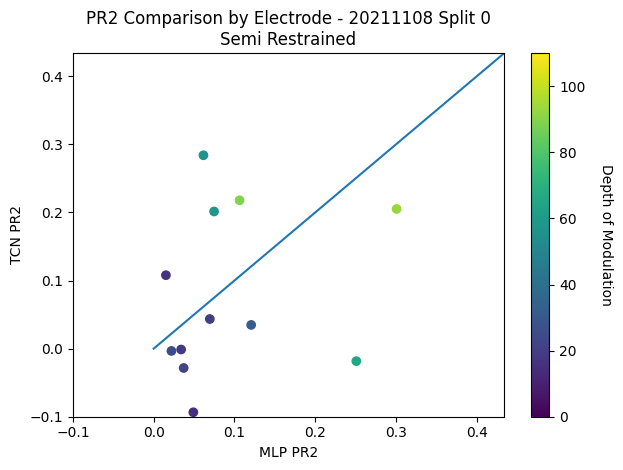

TCN average pR2: -0.6848631501197815
MLP average pR2: -0.918779194355011


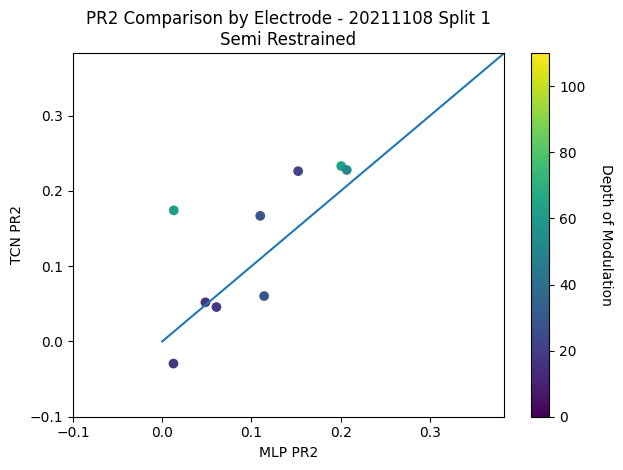

TCN average pR2: -0.43146494030952454
MLP average pR2: -0.3579804599285126


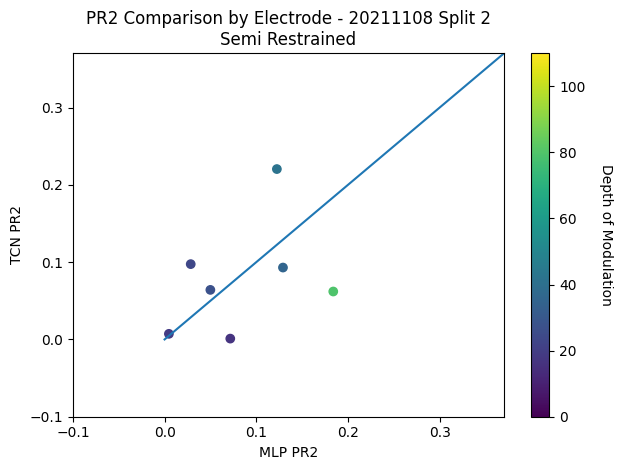

TCN average pR2: -1.8028604984283447
MLP average pR2: -1.3390655517578125


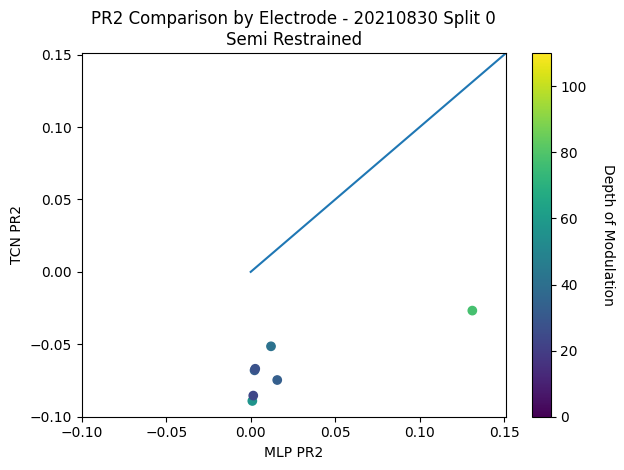

TCN average pR2: -0.7710877656936646
MLP average pR2: -1.1387296915054321


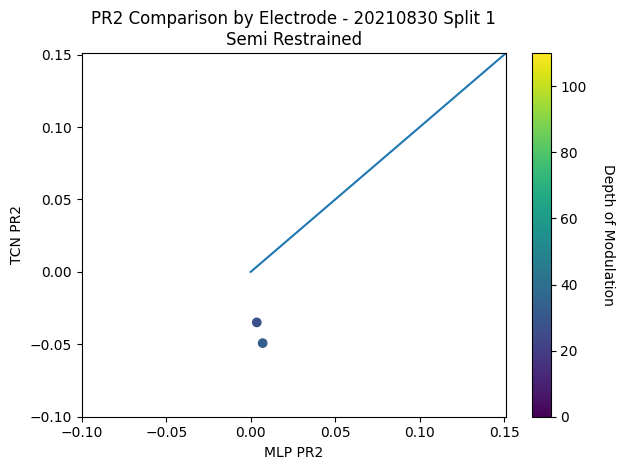

TCN average pR2: -0.8967100381851196
MLP average pR2: -1.235809326171875


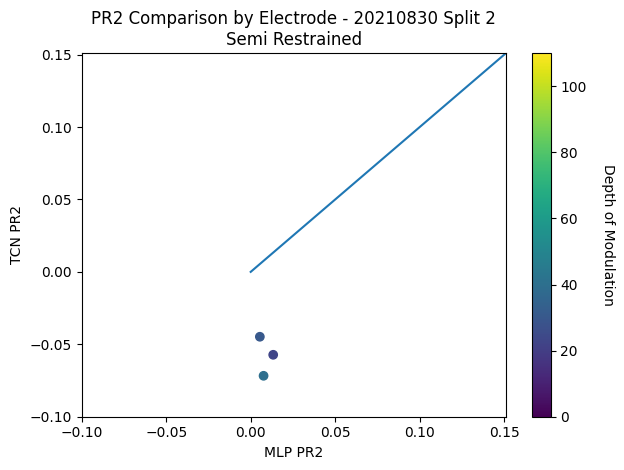

TCN average pR2: -1.7970858812332153
MLP average pR2: -1.1378743648529053


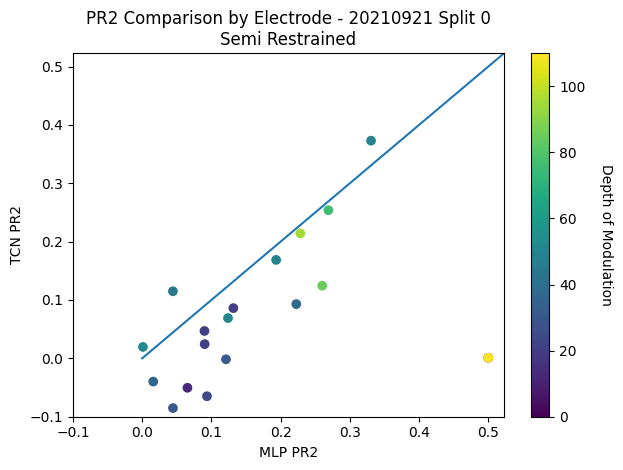

TCN average pR2: -0.7606990933418274
MLP average pR2: -0.729866087436676


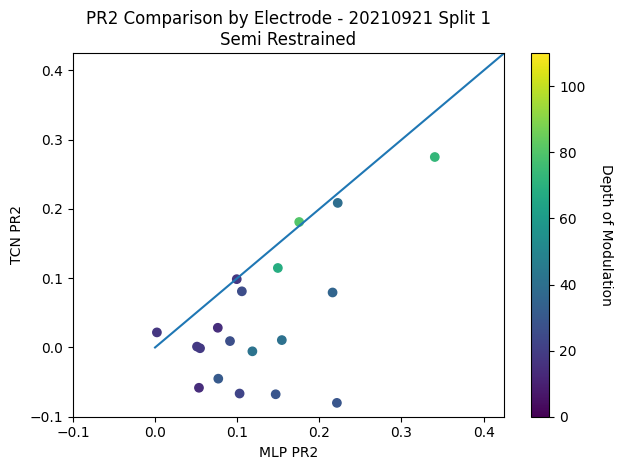

TCN average pR2: -1.5081110000610352
MLP average pR2: -1.2743942737579346


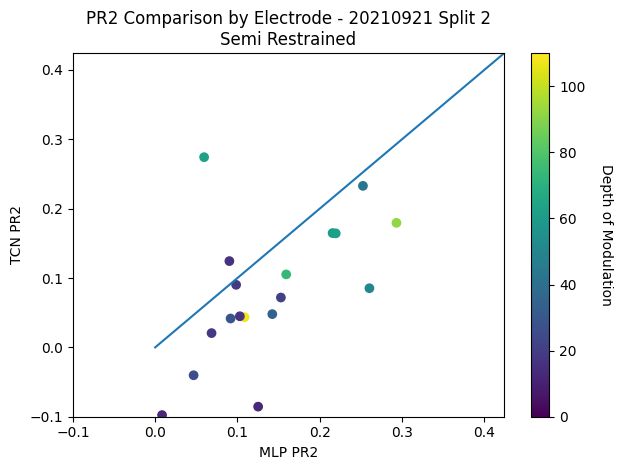

TCN average pR2: -1.1140307188034058
MLP average pR2: -1.0505303144454956


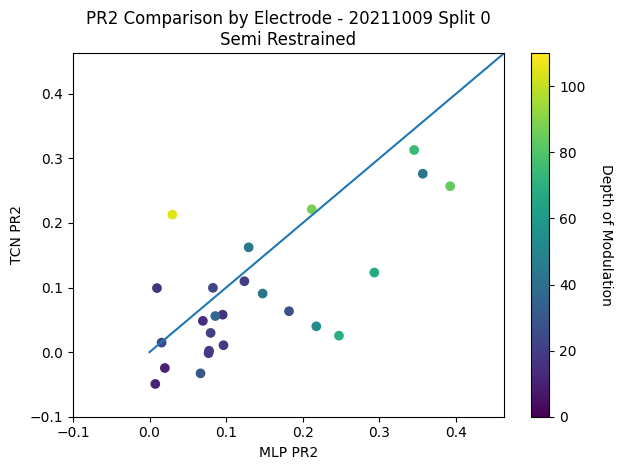

TCN average pR2: -1.285117268562317
MLP average pR2: -0.846856415271759


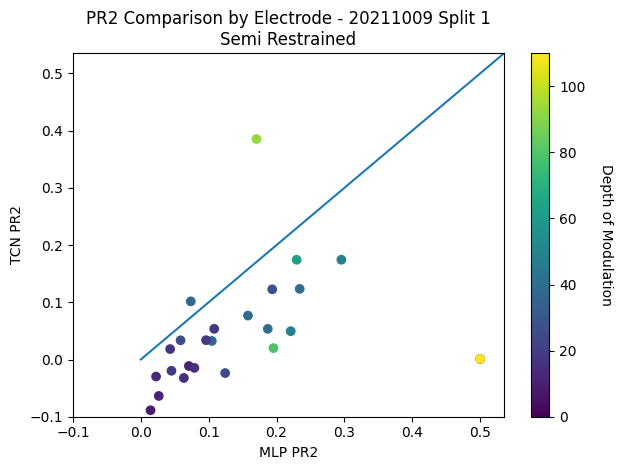

TCN average pR2: -1.2817456722259521
MLP average pR2: -0.5939195156097412


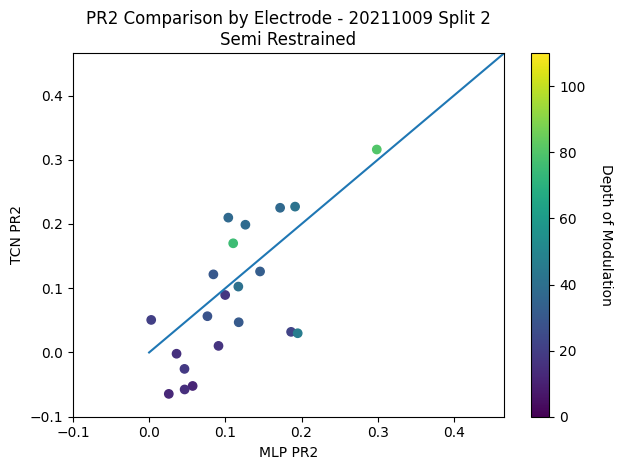

In [24]:
for date in tcn_models_dict.keys():
    for split_num in tcn_models_dict[date].keys():
        model_1_name = 'TCN'
        model1 = tcn_models_dict[date][split_num]
        dataset1 = tcnn_dataset_dict_split[date]['Joint Angles'][split_num]['Full']
        test_loader1 = tcnn_loader_dict_split[date]['Joint Angles'][split_num]['Test']
        conv1 = True
        model_2_name = 'MLP'
        model2 = mlp_models_dict[date][split_num]
        conv2 = False
        dataset2 = dataset_dict_split[date]['Joint Angles'][split_num]['Full']
        test_loader2 = loader_dict_split[date]['Joint Angles'][split_num]['Test']
        visualization.compare_pr2_plots(model_1_name, model1, dataset1, test_loader1, conv1, model_2_name, model2, dataset2, test_loader2, conv2, 'Semi Restrained', exclude_bad_neurons = True,max_dom = 110)
        # print('Mean KS TCN: {}, Mean KS MLP: {}'.format(mean_model_1, mean_model_2))